## Preparação do ambiente

In [8]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


# Configurando parâmetros
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:20,.2f}'.format
plt.style.use("seaborn")


## Leitura dos dados

In [2]:
# Lendo o DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [3]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


### Tamanho do Dataset

In [4]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

### Verificar Tipo dos Dados

In [5]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

### Verificar valores faltantes

In [23]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

## Análise Exploratória

In [11]:
# Qual a Receita total?
round(df["Valor Venda"].sum(), 2)

5984606.14

In [10]:
# Criar coluna de custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) 

In [12]:
# Qual o custo Total?
round(df["custo"].sum(), 2)

2486783.05

In [13]:
# Com a receita e custo total, podemos achar o Lucro
df["lucro"]  = df["Valor Venda"] - df["custo"] 

In [14]:
# Qual lucro total
round(df["lucro"].sum(),2)

3497823.09

In [15]:
# Criar uma coluna calculando a quantidade de dias para enviar o produto
df["dias_envio"] = df["Data Envio"] - df["Data Venda"]

In [16]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,dias_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7 days


In [17]:
# Extrair apenas os dias
df["dias_envio"] = df["dias_envio"].dt.days

In [18]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,dias_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7


In [26]:
# Média do tempo de envio por Marca
df.groupby("Marca", as_index=False).agg({"dias_envio": "mean"})

,Marca,dias_envio
0,Adventure Works,8.66
1,Contoso,8.47
2,Fabrikam,8.51


#### Consolidar o Lucro por Ano e Por Marca

In [27]:
# Realizar agrupamento por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"], as_index=False).agg({"lucro" : sum})

,Marca,lucro
0,Adventure Works,"306,641.16"
1,Contoso,"56,416.00"
2,Fabrikam,"1,557,020.55"
3,Adventure Works,"405,395.08"
4,Contoso,"138,258.95"
5,Fabrikam,"1,034,091.35"


#### Total de Produtos Vendidos

In [30]:
total_produtos_vendidos = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
total_produtos_vendidos

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

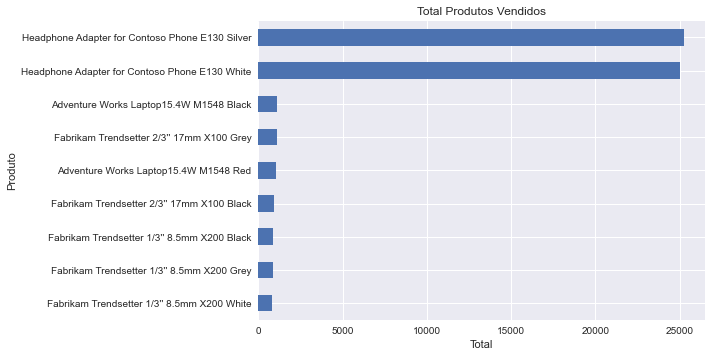

In [33]:
# Plotando gráfico com o total de produtos vendidos
total_produtos_vendidos.sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")
plt.show()

#### Lucro total por ano

In [42]:
lucro_por_ano = df.groupby(df["Data Venda"].dt.year).agg({"lucro": "sum"})
lucro_por_ano

,lucro
Data Venda,
2008,"1,920,077.71"
2009,"1,577,745.38"


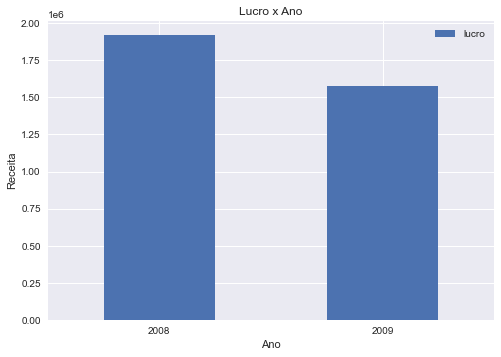

In [45]:
lucro_por_ano.plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal')
plt.show()

### Filtrando apenas as vendas de 2009

In [46]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

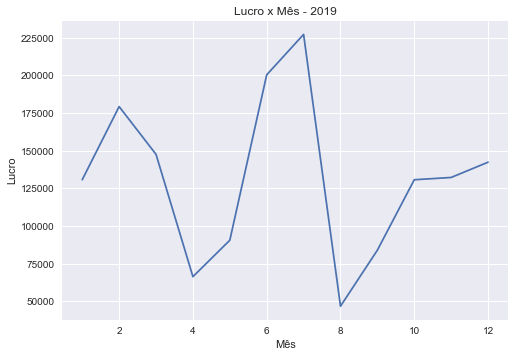

In [49]:
# Lucro por Mês no ano de 2019

df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês - 2019")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.show()

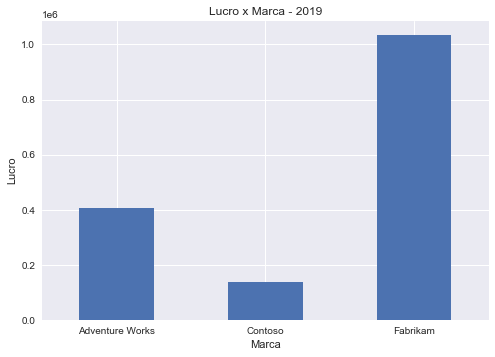

In [50]:
# Lucro por marca no ano de 2019

df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca - 2019")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')
plt.show()

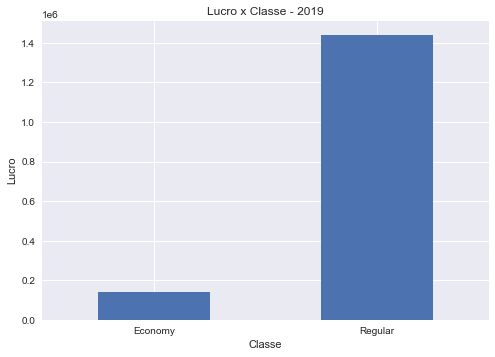

In [51]:
# Lucro por classe do produto em 2019

df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe - 2019")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

#### Analisando melhor o número de dias que demora para realizar o envio dos produtos

In [52]:
df["dias_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: dias_envio, dtype: float64

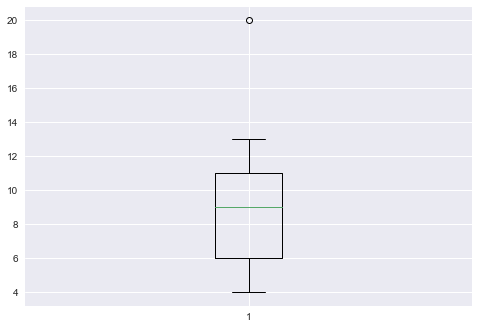

In [53]:
# Plotar gráfico de Boxplot

plt.boxplot(df["dias_envio"]);

Tempo médio de envio de 8,54 dias.

Mais 75% dos envios abaixo de 12 dias.

Um envio (outlier) demorou 20 dias.

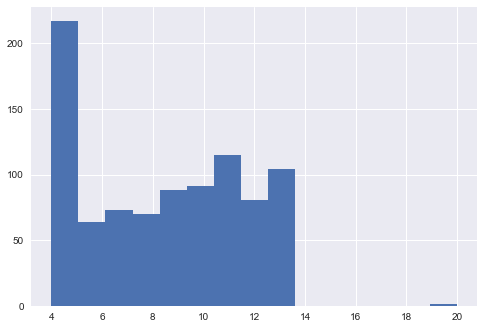

In [60]:
# Plotar gráfico de Histograma
plt.hist(df["dias_envio"], bins=15)
plt.show()

In [62]:
# Buscando o Outlier (envio que demorou 20 dias)
df.loc[df["dias_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,dias_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
